In [1]:
 !pip install transformers

In [2]:
import os
import pandas as pd
import numpy as np

In [3]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [4]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx


In [5]:
df=pd.read_excel('/kaggle/input/3-classes-bangla-sa/3_classes_Bert_Preprocessed__Dataset.xlsx')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15728 entries, 0 to 15727
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  15728 non-null  int64 
 1   Data        15728 non-null  object
 2   Label       15728 non-null  int64 
 3   Token       15728 non-null  object
 4   Token_ID    15728 non-null  object
dtypes: int64(2), object(3)
memory usage: 614.5+ KB


In [6]:
pip install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 41.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 49.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.7/263.7 kB 17.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 30.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for ktrain: filename=ktrain-0.33.0-py3-none-any.whl size=25313832 sha256=d8f68ee7b6491c9c668f673a0b24802f28648ca5119545f7dcfba905ff83c48d
  Stored in directory: /root/.cache/pip/wheels/cb/c2/1a/db7e1066fb4a94be

In [7]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "0" 

In [8]:
import ktrain
from ktrain import text

In [9]:
df_filtered = df[df['Label'] > 0]
df=df_filtered

In [10]:
df.Label.value_counts(), len(df)

(1    6410
 2    5709
 Name: Label, dtype: int64,
 12119)

In [11]:
def Label(label):
    if(label==1):
        return 'positive'
    elif(label==0):
        return 'neutral'
    elif(label==2):
        return 'negative'
df['Sentiment'] = df['Label'].apply(Label)
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 Name: Sentiment, dtype: int64,
 12119)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df['Label'])
encoded_labels = le.transform(df['Label'])
labels = np.array(encoded_labels) # Converting into numpy array
class_names =le.classes_
print(class_names)

In [12]:
df.Sentiment.value_counts(), len(df)

(positive    6410
 negative    5709
 Name: Sentiment, dtype: int64,
 12119)

In [13]:
df.head()

,Unnamed: 0,Data,Label,Token,Token_ID,Sentiment
0,4032,এক মাস সেহেরি খাইয়া রোজা রাহা সোজা,1,"['এক', 'মাস', 'সে', '##হের', '##ি', '[UNK]', '...","[788, 1293, 809, 2685, 416, 1, 12209, 3462, 41...",positive
1,3587,ভাই আমাদের মাতৃভুমিটা এত সুনদর,1,"['ভাই', 'আমাদের', 'মাতৃ', '##ভু', '##মিট', '##...","[1352, 1029, 6563, 12357, 12290, 415, 1284, 36...",positive
2,8968,জানুয়ারীতে কেন ঐ সময় স্পেশাল কি,1,"['[UNK]', 'কেন', 'ঐ', '[UNK]', 'স্পেশাল', 'কি']","[1, 1107, 218, 1, 10225, 817]",positive
3,95,তোরা কখন কাচা রসুন চাবিয়ে খেয়ে দেখেচিস,2,"['তোরা', 'কখন', 'কাচা', 'রসুন', '[UNK]', '[UNK...","[5712, 1394, 30306, 18173, 1, 1, 1172, 2408, 417]",negative
4,1163,হ্যাঁ হ্যাঁ হ্যাঁ হ্যাঁ জীবন টা বেদনা,2,"['হ্যাঁ', 'হ্যাঁ', 'হ্যাঁ', 'হ্যাঁ', 'জীবন', '...","[2154, 2154, 2154, 2154, 1537, 1632, 10018]",negative


In [14]:
train=df[:int(.8*len(df))]
test=df[int(.8*len(df)):int(.9*len(df))]
validation=df[int(.9*len(df)):]
x_train=train['Token'].tolist()
y_train=train['Sentiment'].tolist()
x_validation=validation['Token'].tolist()
y_validation=validation['Sentiment'].tolist()
x_test=test['Token'].tolist()
y_test=test['Sentiment'].tolist()

In [15]:
x_train= np.array(x_train)
x_validation= np.array(x_validation)
x_test= np.array(x_test)


In [16]:
categories = ['positive','negative']

In [17]:
model_name = 'bert-base-multilingual-uncased'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/953M [00:00<?, ?B/s]

In [18]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


/opt/conda/lib/python3.7/site-packages/ktrain/utils.py:746: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/851k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.64M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


In [19]:
model = trans.get_classifier()

In [20]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [21]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(2)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
807/807 [==============================] - 166s 177ms/step - loss: 0.6912 - accuracy: 0.5252
Epoch 2/10
807/807 [==============================] - 147s 182ms/step - loss: 0.6493 - accuracy: 0.6107
Epoch 3/10
807/807 [==============================] - 146s 181ms/step - loss: 0.5357 - accuracy: 0.7378
Epoch 4/10
807/807 [==============================] - 146s 181ms/step - loss: 0.5481 - accuracy: 0.7227
Epoch 5/10
807/807 [==============================] - 146s 180ms/step - loss: 0.7015 - accuracy: 0.5161
Epoch 6/10
807/807 [==============================] - 146s 180ms/step - loss: 0.7561 - accuracy: 0.5010
Epoch 7/10
807/807 [==============================] - 142s 176ms/step - loss: 2.2029 - accuracy: 0.5064


done.
Visually inspect loss plot and select learning rate associated with falling loss


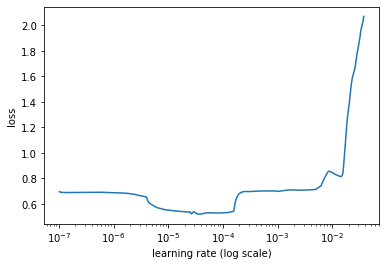

In [22]:
learner.lr_find(show_plot = True,max_epochs=10)

In [23]:
learner.fit_onecycle(5e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 5e-05...
Epoch 1/10
808/808 [==============================] - 171s 191ms/step - loss: 0.6039 - accuracy: 0.6553 - val_loss: 0.5106 - val_accuracy: 0.7574
Epoch 2/10
808/808 [==============================] - 150s 185ms/step - loss: 0.4864 - accuracy: 0.7657 - val_loss: 0.4893 - val_accuracy: 0.7706
Epoch 3/10
808/808 [==============================] - 150s 185ms/step - loss: 0.4356 - accuracy: 0.7988 - val_loss: 0.4751 - val_accuracy: 0.7624
Epoch 4/10
808/808 [==============================] - 150s 186ms/step - loss: 0.3895 - accuracy: 0.8284 - val_loss: 0.5217 - val_accuracy: 0.7789
Epoch 5/10
808/808 [==============================] - 149s 185ms/step - loss: 0.3665 - accuracy: 0.8444 - val_loss: 0.4641 - val_accuracy: 0.7987
Epoch 6/10
808/808 [==============================] - 150s 185ms/step - loss: 0.3140 - accuracy: 0.8666 - val_loss: 0.4955 - val_accuracy: 0.8061
Epoch 7/10
808/808 [==============================] - 150s 18

In [24]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

    positive       0.82      0.80      0.81       578
    negative       0.82      0.84      0.83       634

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



array([[462, 116],
       [101, 533]])

In [25]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

    positive       0.82      0.80      0.81       578
    negative       0.82      0.84      0.83       634

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



array([[462, 116],
       [101, 533]])

In [26]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [27]:
y_pred_mbert_uncased = predictor.predict(x_test)
#print(y_pred)

In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_mbert_uncased))

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80       554
    positive       0.83      0.84      0.83       658

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



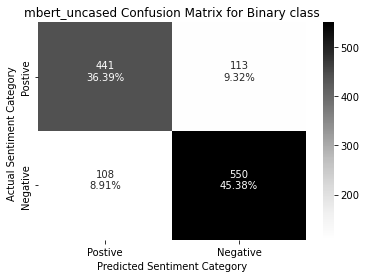

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_mbert_uncased)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('mbert_uncased Confusion Matrix for Binary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('mbert_uncased Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [30]:
model_name = 'monsoon-nlp/bangla-electra'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/51.6M [00:00<?, ?B/s]

In [31]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


/opt/conda/lib/python3.7/site-packages/ktrain/utils.py:746: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/161 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/481k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


In [32]:
model = trans.get_classifier()

In [33]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [34]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(2)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
807/807 [==============================] - 69s 62ms/step - loss: 0.6932 - accuracy: 0.5028
Epoch 2/10
807/807 [==============================] - 52s 64ms/step - loss: 0.6921 - accuracy: 0.5273
Epoch 3/10
807/807 [==============================] - 53s 65ms/step - loss: 0.6665 - accuracy: 0.5969
Epoch 4/10
807/807 [==============================] - 51s 63ms/step - loss: 0.5991 - accuracy: 0.6887
Epoch 5/10
807/807 [==============================] - 52s 64ms/step - loss: 0.6057 - accuracy: 0.6598
Epoch 6/10
807/807 [==============================] - 52s 65ms/step - loss: 0.6950 - accuracy: 0.5199
Epoch 7/10
807/807 [==============================] - 51s 63ms/step - loss: 0.7001 - accuracy: 0.5171
Epoch 8/10
807/807 [==============================] - 52s 65ms/step - loss: 0.7004 - accuracy: 0.5115
Epoch 9/10
807/807 [==============================] - 52s 64ms/step - loss: 0.7472 - accuracy: 0.4973

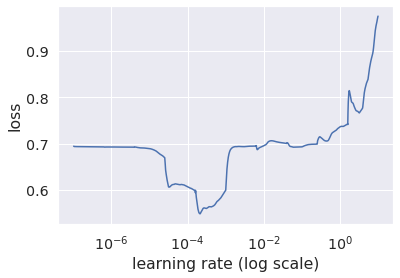

In [35]:
learner.lr_find(show_plot = True,max_epochs=10)

In [36]:
learner.fit_onecycle(1e-4,10,class_weight=weight) 



begin training using onecycle policy with max lr of 0.0001...
Epoch 1/10
808/808 [==============================] - 77s 74ms/step - loss: 0.6702 - accuracy: 0.5833 - val_loss: 0.5982 - val_accuracy: 0.6889
Epoch 2/10
808/808 [==============================] - 54s 66ms/step - loss: 0.5549 - accuracy: 0.7270 - val_loss: 0.5186 - val_accuracy: 0.7417
Epoch 3/10
808/808 [==============================] - 55s 68ms/step - loss: 0.4941 - accuracy: 0.7659 - val_loss: 0.5197 - val_accuracy: 0.7450
Epoch 4/10
808/808 [==============================] - 56s 69ms/step - loss: 0.4292 - accuracy: 0.8084 - val_loss: 0.4589 - val_accuracy: 0.7789
Epoch 5/10
808/808 [==============================] - 53s 65ms/step - loss: 0.3750 - accuracy: 0.8405 - val_loss: 0.4987 - val_accuracy: 0.7789
Epoch 6/10
808/808 [==============================] - 55s 68ms/step - loss: 0.3034 - accuracy: 0.8765 - val_loss: 0.4775 - val_accuracy: 0.7987
Epoch 7/10
808/808 [==============================] - 55s 68ms/step - lo

In [37]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

    positive       0.81      0.83      0.82       578
    negative       0.84      0.82      0.83       634

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



array([[477, 101],
       [112, 522]])

In [38]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [39]:
y_pred_monsoon = predictor.predict(x_test)

In [40]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_monsoon))

              precision    recall  f1-score   support

    negative       0.81      0.80      0.80       554
    positive       0.83      0.84      0.84       658

    accuracy                           0.82      1212
   macro avg       0.82      0.82      0.82      1212
weighted avg       0.82      0.82      0.82      1212



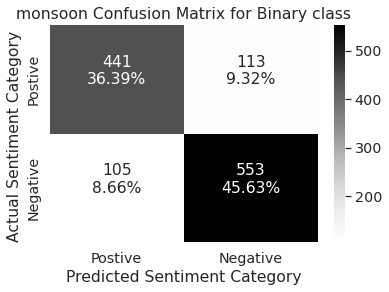

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_monsoon)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('monsoon Confusion Matrix for Binary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('Confusion Matrix monsoon.png', bbox_inches = "tight")
plt.show()

In [42]:
model_name = 'xlm-roberta-base'
trans = text.Transformer(model_name,maxlen=50,class_names=categories)

Downloading:   0%|          | 0.00/615 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/512 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.76G [00:00<?, ?B/s]

In [43]:
train = trans.preprocess_train(x_train,y_train)
valid = trans.preprocess_test(x_validation,y_validation)

preprocessing train...
language: bn
train sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


/opt/conda/lib/python3.7/site-packages/ktrain/utils.py:746: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  "class_names argument was ignored, as they were extracted from string labels in dataset"


Downloading:   0%|          | 0.00/4.83M [00:00<?, ?B/s]

Is Multi-Label? False
preprocessing test...
language: bn
test sequence lengths:
	mean : 17
	95percentile : 38
	99percentile : 48


In [44]:
model = trans.get_classifier()

In [45]:
learner = ktrain.get_learner(model, train_data=train,val_data=valid, batch_size=12)

In [46]:
from sklearn.utils import class_weight
class_weight=class_weight.compute_class_weight(class_weight='balanced',classes=np.unique(y_train),y=y_train)
weight={i:class_weight[i] for i in range(2)}

simulating training for different learning rates... this may take a few moments...
Epoch 1/10
807/807 [==============================] - 209s 235ms/step - loss: 0.6934 - accuracy: 0.5072
Epoch 2/10
807/807 [==============================] - 192s 238ms/step - loss: 0.6618 - accuracy: 0.5986
Epoch 3/10
807/807 [==============================] - 191s 237ms/step - loss: 0.5779 - accuracy: 0.7135
Epoch 4/10
807/807 [==============================] - 191s 237ms/step - loss: 0.6321 - accuracy: 0.6121
Epoch 5/10
807/807 [==============================] - 191s 237ms/step - loss: 0.7054 - accuracy: 0.5076
Epoch 6/10
807/807 [==============================] - 191s 237ms/step - loss: 0.7445 - accuracy: 0.4948
Epoch 7/10
807/807 [==============================] - 183s 227ms/step - loss: 2.4010 - accuracy: 0.4995


done.
Visually inspect loss plot and select learning rate associated with falling loss


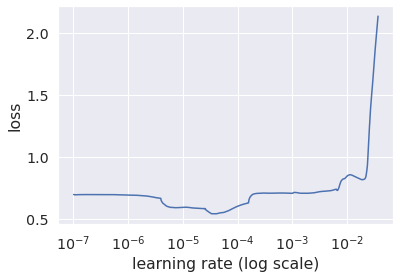

In [47]:
learner.lr_find(show_plot = True,max_epochs=10)

In [48]:
learner.fit_onecycle(1e-5,10,class_weight=weight) 



begin training using onecycle policy with max lr of 1e-05...
Epoch 1/10
808/808 [==============================] - 216s 248ms/step - loss: 0.6692 - accuracy: 0.5710 - val_loss: 0.5725 - val_accuracy: 0.7211
Epoch 2/10
808/808 [==============================] - 196s 243ms/step - loss: 0.5700 - accuracy: 0.7206 - val_loss: 0.5304 - val_accuracy: 0.7343
Epoch 3/10
808/808 [==============================] - 196s 242ms/step - loss: 0.5177 - accuracy: 0.7526 - val_loss: 0.5138 - val_accuracy: 0.7583
Epoch 4/10
808/808 [==============================] - 195s 242ms/step - loss: 0.4798 - accuracy: 0.7808 - val_loss: 0.4661 - val_accuracy: 0.7871
Epoch 5/10
808/808 [==============================] - 196s 242ms/step - loss: 0.4396 - accuracy: 0.8018 - val_loss: 0.5117 - val_accuracy: 0.7888
Epoch 6/10
808/808 [==============================] - 196s 242ms/step - loss: 0.3999 - accuracy: 0.8239 - val_loss: 0.5017 - val_accuracy: 0.7946
Epoch 7/10
808/808 [==============================] - 196s 24

In [49]:
learner.validate(class_names=categories)

              precision    recall  f1-score   support

    positive       0.80      0.79      0.79       578
    negative       0.81      0.82      0.81       634

    accuracy                           0.80      1212
   macro avg       0.80      0.80      0.80      1212
weighted avg       0.80      0.80      0.80      1212



array([[458, 120],
       [117, 517]])

In [50]:
predictor = ktrain.get_predictor(learner.model, preproc=trans)

In [51]:
y_pred_xlm_roberta = predictor.predict(x_test)
#print(y_pred)

In [52]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_xlm_roberta))

              precision    recall  f1-score   support

    negative       0.81      0.81      0.81       554
    positive       0.84      0.84      0.84       658

    accuracy                           0.83      1212
   macro avg       0.83      0.83      0.83      1212
weighted avg       0.83      0.83      0.83      1212



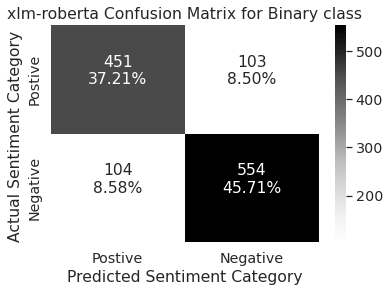

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, y_pred_xlm_roberta)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('xlm-roberta Confusion Matrix for Binary class');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('xlm-roberta Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [54]:
import pandas as pd
sub_all=pd.DataFrame({'mbert_uncased':y_pred_mbert_uncased,'monsoon':y_pred_monsoon,'xlm_roberta':y_pred_xlm_roberta})
pred_mode=sub_all.agg('mode',axis=1)[0].values
sub_all.head()

,mbert_uncased,monsoon,xlm_roberta
0,negative,negative,negative
1,positive,positive,positive
2,negative,negative,negative
3,negative,negative,positive
4,negative,negative,negative


In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred_mode))

              precision    recall  f1-score   support

    negative       0.84      0.82      0.83       554
    positive       0.85      0.86      0.86       658

    accuracy                           0.84      1212
   macro avg       0.84      0.84      0.84      1212
weighted avg       0.84      0.84      0.84      1212



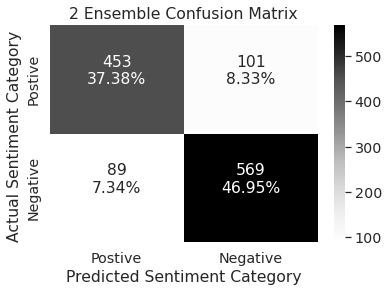

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, pred_mode)
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n" for v1, v2 in
          zip(group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Greys')

ax.set_title('2 Ensemble Confusion Matrix');
ax.set_xlabel('Predicted Sentiment Category')
ax.set_ylabel('Actual Sentiment Category ');

ax.xaxis.set_ticklabels(['Postive', 'Negative'])
ax.yaxis.set_ticklabels(['Postive', 'Negative'])
sns.set(color_codes=True)
sns.set(font_scale=1.3)
plt.savefig('2 Ensemble Confusion Matrix.png', bbox_inches = "tight")
plt.show()

In [57]:
df_result= sub_all
df_result['final prediction']= pred_mode 
df_result.to_csv('2 classes Ensemble Prediction results.csv', index=True)

In [58]:
df_result= sub_all
df_result['final prediction']= pred_mode
df_result['Text']=x_test
df_result.to_csv('2 classes Ensemble Prediction results.csv', index=True)